In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("survey_results_public.csv")
pd.set_option('display.max_row', 500)
pd.set_option('display.float_format', '{:.2f}'.format)
'''

df = df.drop(columns=['ResponseId','CodingActivities','Employment','OrgSize','TechList','PurchaseInfluence','BuyNewTool','PlatformHaveWorkedWith','PlatformWantToWorkWith','Q120','DatabaseHaveWorkedWith','DatabaseWantToWorkWith','WebframeHaveWorkedWith','WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith','NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'SOAI', 'AISelect',
       'AISent', 'AIAcc', 'AIBen'],axis=1)
'''
''' Não uteis
    CodingActivities
    Employment
    OrgSize
    TechList
    PurchaseInfluence
    BuyNewTool
    Currency
'''
''' Kinda
    LearnCode
    LearnCodeOnline
    LearnCodeCoursesCert
    YearsCode
    DevType
    LanguageHaveWorkedWith
    AISearchHaveWorkedWith
    WorkExp
    TimeAnswering
'''
''' Uteis
    EdLevel
    RemoteWork
    Country
    ConvertedCompYearly
'''
df


C:\Users\Leo\AppData\Local\Temp\ipykernel_15060\3040307287.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,MainBranch,Age,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,0,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,I am a developer by profession,25-34 years old,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.00
2,2,I am a developer by profession,45-54 years old,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.00
3,3,I am a developer by profession,25-34 years old,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.00
4,4,I am a developer by profession,25-34 years old,Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89179,I am a developer by profession,25-34 years old,Remote,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,20,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89180,I am a developer by profession,18-24 years old,"Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89181,I code primarily as a hobby,Prefer not to say,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,Codecademy;Coursera,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89182,I am a developer by profession,Under 18 years old,"Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [3]:
test = df.LanguageWantToWorkWith.dropna()
array = []
for val in test:
    temp = val.split(";")
    for item in temp:
        array.append(item)
dfLTWW = pd.DataFrame(array)
dfLTWW.value_counts(normalize=True).round(4)*100

test2 = df.LanguageHaveWorkedWith.dropna()
array2 = []
for val in test2:
    temp = val.split(";")
    for item in temp:
        array2.append(item)



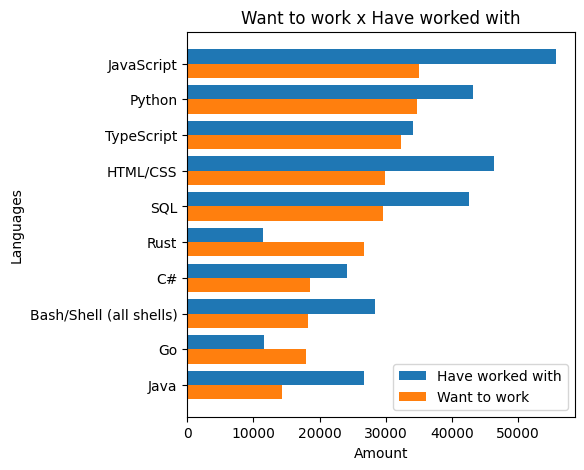

In [9]:
dffinal = pd.DataFrame(pd.DataFrame(array).value_counts())
dfmerge = pd.DataFrame(pd.DataFrame(array2).value_counts())
dfmerge.reset_index(inplace=True)                       
dffinal.reset_index(inplace=True)
dffinal = dffinal.rename(columns = {0:'Items'})
dfmerge = dfmerge.rename(columns = {0:'Items'})

result = pd.merge(dffinal, dfmerge, on='Items', how='inner')
result = result.head(10)

X = result.Items
Ygirls = result.count_x	
Zboys = result.count_y

X_axis = np.arange(len(X))[::-1]

plt.figure(figsize=[5,5])

plt.barh(X_axis + 0.2, Zboys, 0.4, label = 'Have worked with') 
plt.barh(X_axis - 0.2, Ygirls, 0.4, label = 'Want to work') 


plt.yticks(X_axis, X) 
plt.xlabel("Amount") 
plt.ylabel("Languages") 
plt.title("Want to work x Have worked with") 
plt.legend()
plt.show()

In [48]:
ConvertedCompYearly = df[['Country','ConvertedCompYearly']].dropna()
ConvertedCompYearly = ConvertedCompYearly[(ConvertedCompYearly['ConvertedCompYearly'] > 13000.00) & (ConvertedCompYearly['ConvertedCompYearly'] < 1000000.00)]

ConvertedCompYearly = ConvertedCompYearly.groupby("Country")
ConvertedCompYearly = ConvertedCompYearly.mean()
ConvertedCompYearly = ConvertedCompYearly.sort_values(by='ConvertedCompYearly')[::-1]
ConvertedCompYearly.head()

,ConvertedCompYearly
Country,
United States of America,166719.33
Switzerland,135299.99
Kuwait,133320.80
Dominica,132857.00
Swaziland,132796.67


In [41]:
RemoteWork = df[['RemoteWork', 'ConvertedCompYearly']].dropna()
RemoteWork = RemoteWork[(RemoteWork['ConvertedCompYearly'] > 1000.00) & (RemoteWork['ConvertedCompYearly'] < 1000000.00)]
RemoteWork.replace('Hybrid (some remote, some in-person)','Hybrid',inplace=True)
RemoteWork = RemoteWork.groupby("RemoteWork")
RemoteWork = RemoteWork.mean()
RemoteWork = RemoteWork.sort_values(by='ConvertedCompYearly')[::-1]
RemoteWork

,ConvertedCompYearly
RemoteWork,
Remote,108693.88
Hybrid,91917.20
In-person,77399.83


In [27]:
EdLevel = df[['EdLevel',"ConvertedCompYearly"]].dropna()
EdLevel = EdLevel[(EdLevel['ConvertedCompYearly'] > 1000.00) & (EdLevel['ConvertedCompYearly'] < 1000000.00)]
EdLevel = EdLevel.groupby('EdLevel')
EdLevel = EdLevel.mean()
EdLevel = EdLevel.sort_values(by='ConvertedCompYearly')[::-1]
EdLevel

,ConvertedCompYearly
EdLevel,
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",104634.58
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",97412.67
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",94908.69
Some college/university study without earning a degree,87939.44
Primary/elementary school,87201.00
"Associate degree (A.A., A.S., etc.)",87060.63
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",71509.27
Something else,68410.27


In [53]:
ProfessionalTech = df[['LearnCodeCoursesCert','ConvertedCompYearly']]

ProfessionalTech.ConvertedCompYearly = ProfessionalTech['ConvertedCompYearly'].dropna()
ProfessionalTech = ProfessionalTech[(ProfessionalTech['ConvertedCompYearly'] > 1000.00) & (ProfessionalTech['ConvertedCompYearly'] < 1000000.00)]
ProfessionalTech = ProfessionalTech.groupby('LearnCodeCoursesCert')
ProfessionalTech = ProfessionalTech.mean()
ProfessionalTech = ProfessionalTech.sort_values(by='ConvertedCompYearly')[::-1]
ProfessionalTech.head()

C:\Users\Leo\AppData\Local\Temp\ipykernel_15060\2920571796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ProfessionalTech.ConvertedCompYearly = ProfessionalTech['ConvertedCompYearly'].dropna()


,ConvertedCompYearly
LearnCodeCoursesCert,
Udemy;Pluralsight;Udacity;Skillsoft,500000.00
Other;Udemy;Coursera;Udacity;Skillsoft,267724.00
Codecademy;Pluralsight;Coursera;Skillsoft,190000.00
Other;Codecademy;Pluralsight;Coursera,166500.00
Codecademy;edX;Coursera;Udacity;Skillsoft,165260.00


In [59]:
DevType = df[['DevType','ConvertedCompYearly']].dropna()
DevType = DevType[(DevType['ConvertedCompYearly'] > 1000.00) & (DevType['ConvertedCompYearly'] < 1000000.00)]
DevType = DevType.groupby('DevType')
DevType = DevType.mean()
DevType = DevType.sort_values(by='ConvertedCompYearly')[::-1]
DevType.drop('Other (please specify):',inplace=True)
DevType

,ConvertedCompYearly
DevType,
"Senior Executive (C-Suite, VP, etc.)",152815.17
Engineering manager,139279.67
Developer Experience,137462.70
"Engineer, site reliability",136991.31
Cloud infrastructure engineer,128499.06
Marketing or sales professional,128233.05
Developer Advocate,127967.26
Security professional,127136.11
Product manager,124339.57
